# Text analysis I

In this notebook, we will:

- Calculate interrater reliability.
- Export data for coding.
- Import coded data.
- Score text with built-in TextBlob sentiment.

In [1]:
import random

import pandas as pd
import numpy as np
import nltk

from textblob import TextBlob
from sklearn.metrics import cohen_kappa_score
from nltk import agreement

## Interrater reliability

In [2]:
# Generate some data.
true_scores = [random.randrange(1, 7) for i in range(200)]
r1_diff = [random.randrange(-1, 1) for i in range(200)]
r2_diff = [random.randrange(-1, 1) for i in range(200)]
r3_diff = [random.randrange(-1, 1) for i in range(200)]

ratings = pd.DataFrame(true_scores, columns=['true_scores'])

ratings['item'] = range(200)
ratings['r1'] = ratings['true_scores'] + r1_diff
ratings['r2'] = ratings['true_scores'] + r2_diff
ratings['r3'] = ratings['true_scores'] + r3_diff
ratings= ratings.clip(1, 7)

ratings.head()

,true_scores,item,r1,r2,r3
0,6,1,5,5,6
1,2,1,1,2,2
2,1,2,1,1,1
3,5,3,5,5,4
4,3,4,2,3,3


In [3]:
# For two raters
print(cohen_kappa_score(ratings['r1'], ratings['r2']))
print(cohen_kappa_score(ratings['r2'], ratings['r3']))
print(cohen_kappa_score(ratings['r1'], ratings['r3']))

0.54233409610984
0.4605694670058542
0.44795436422744284


## Tokenization
### Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller segments such as words or sentence is called Tokenization.

In [4]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Source: The abstract of this article: Gielens, K., & Steenkamp, J. B. E. (2019). Branding in the era of digital (dis) intermediation. International Journal of Research in Marketing, 36(3), 367-384.

text="""Marketing academics are keenly aware of the seismic shifts in today's marketing environmentcaused by digital (dis)intermediation. In this article, we discuss four types of digital (dis)intermediation, and how they affect branding activities of incumbents and new firms. First, we discuss
digital transaction intermediation, a development that is closely tied to the rise of ecommerce retailers. A second type is digital transaction disintermediation associated with the rise of
ecommerce D2C models. These first two types of digital (dis) intermediation are primarily topdown processes, where firms are developing new ways to sell their brands to consumers. The
next two types of digital (dis) intermediation are of the bottom-up kind — the consumer is in the driver's seat. Digital marketing intermediation and the rise of D2C brand-building models is
powered by crowdsourcing. A final development is digital marketing disintermediation, which is closely tied to the rise of C2C models. We present issues in need of future research for each
type of digital (dis)intermediation. We conclude with an appeal that marketing takes the lead in developing overarching, indigenous theories of digital (dis)intermediation to make sense of
the rapid changes in the marketplace."""

tokenized_text = sent_tokenize(text)

print(tokenized_text)

["Marketing academics are keenly aware of the seismic shifts in today's marketing environmentcaused by digital (dis)intermediation.", 'In this article, we discuss four types of digital (dis)intermediation, and how they affect branding activities of incumbents and new firms.', 'First, we discuss\ndigital transaction intermediation, a development that is closely tied to the rise of ecommerce retailers.', 'A second type is digital transaction disintermediation associated with the rise of\necommerce D2C models.', 'These first two types of digital (dis) intermediation are primarily topdown processes, where firms are developing new ways to sell their brands to consumers.', "The\nnext two types of digital (dis) intermediation are of the bottom-up kind — the consumer is in the driver's seat.", 'Digital marketing intermediation and the rise of D2C brand-building models is\npowered by crowdsourcing.', 'A final development is digital marketing disintermediation, which is closely tied to the rise 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiada\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Marketing', 'academics', 'are', 'keenly', 'aware', 'of', 'the', 'seismic', 'shifts', 'in', 'today', "'s", 'marketing', 'environmentcaused', 'by', 'digital', '(', 'dis', ')', 'intermediation', '.', 'In', 'this', 'article', ',', 'we', 'discuss', 'four', 'types', 'of', 'digital', '(', 'dis', ')', 'intermediation', ',', 'and', 'how', 'they', 'affect', 'branding', 'activities', 'of', 'incumbents', 'and', 'new', 'firms', '.', 'First', ',', 'we', 'discuss', 'digital', 'transaction', 'intermediation', ',', 'a', 'development', 'that', 'is', 'closely', 'tied', 'to', 'the', 'rise', 'of', 'ecommerce', 'retailers', '.', 'A', 'second', 'type', 'is', 'digital', 'transaction', 'disintermediation', 'associated', 'with', 'the', 'rise', 'of', 'ecommerce', 'D2C', 'models', '.', 'These', 'first', 'two', 'types', 'of', 'digital', '(', 'dis', ')', 'intermediation', 'are', 'primarily', 'topdown', 'processes', ',', 'where', 'firms', 'are', 'developing', 'new', 'ways', 'to', 'sell', 'their', 'brands', 'to', '

In [6]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 107 samples and 223 outcomes>


In [7]:
fdist.most_common(5)

[('of', 14), ('the', 11), ('.', 10), ('digital', 9), ('intermediation', 8)]

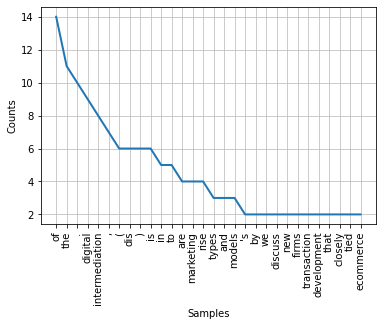

In [8]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

## Stopwords usually do not contribute to the main goal of the research. Text may contain stop words such as is, am, are, this, a, an, the, etc.

## In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)

{'just', 'now', 'under', "you'll", 'all', 'other', "didn't", 'in', 'below', 'do', 'not', "needn't", 'as', 'ours', 'what', 'so', 'before', 'of', 'been', 'which', 'isn', 'their', "aren't", 'some', 'against', 'from', 'have', 'off', 'doing', 'by', "hasn't", 'm', "weren't", 'herself', 'is', 'did', 'such', 'are', 'him', "it's", 'don', "hadn't", 'shouldn', 'were', "you're", 'then', 'our', 'up', 'himself', "mightn't", 'an', 'out', 've', "mustn't", 'on', 'but', 'hadn', 'me', 'theirs', 'am', 'needn', 'any', 'should', "doesn't", 'with', 'this', 'those', 'both', 'during', 'it', 'your', 'having', 'after', "wasn't", 'ourselves', 'above', 'only', 'themselves', "shouldn't", 'wouldn', 'you', 'when', 'where', 'once', 'they', 'same', 'his', 'into', 'wasn', 'and', 'each', 'he', 'about', 'here', 'she', 'yours', 'had', "wouldn't", 'mustn', 'll', "shan't", 'no', 'that', "she's", 'haven', 'them', 'or', 'has', 'these', 'until', 'most', 'won', 'whom', 'can', "couldn't", 'at', 'couldn', "you've", 'a', 'if', 'was

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tokenized_sent = tokenized_word
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Marketing', 'academics', 'are', 'keenly', 'aware', 'of', 'the', 'seismic', 'shifts', 'in', 'today', "'s", 'marketing', 'environmentcaused', 'by', 'digital', '(', 'dis', ')', 'intermediation', '.', 'In', 'this', 'article', ',', 'we', 'discuss', 'four', 'types', 'of', 'digital', '(', 'dis', ')', 'intermediation', ',', 'and', 'how', 'they', 'affect', 'branding', 'activities', 'of', 'incumbents', 'and', 'new', 'firms', '.', 'First', ',', 'we', 'discuss', 'digital', 'transaction', 'intermediation', ',', 'a', 'development', 'that', 'is', 'closely', 'tied', 'to', 'the', 'rise', 'of', 'ecommerce', 'retailers', '.', 'A', 'second', 'type', 'is', 'digital', 'transaction', 'disintermediation', 'associated', 'with', 'the', 'rise', 'of', 'ecommerce', 'D2C', 'models', '.', 'These', 'first', 'two', 'types', 'of', 'digital', '(', 'dis', ')', 'intermediation', 'are', 'primarily', 'topdown', 'processes', ',', 'where', 'firms', 'are', 'developing', 'new', 'ways', 'to', 'sell', 'their

## Python Regular Expression Tutorial
### Regular expressions are a generalized way to match patterns with sequences of characters. It is used in every programming language like C++, Java and Python.

https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial

<br>

## Basic Patterns: Ordinary Characters
### One can easily tackle many basic patterns in Python using ordinary characters. Examples are 'A', 'a', 'X', '5'. The match() function returns a match object if the text matches the pattern.

https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial


https://www.geeksforgeeks.org/write-regular-expressions/

In [11]:
import re

pattern = r"Cookie"
sequence = "Cookie"
if re.match(pattern, sequence):
    print("Match!")
else: print("Not a match!")

Match!


## One may try matching various strings against the RE [a-z]+. An empty string shouldn’t match at all, since + means ‘one or more repetitions’. match() should return None in this case, which will cause the interpreter to print no output. You can explicitly print the result of match() to make this clear.

In [12]:
import re
p = re.compile('[a-z]+')
p

re.compile(r'[a-z]+', re.UNICODE)

In [13]:
p.match('')
print(p.match('abcdefg'))

<re.Match object; span=(0, 7), match='abcdefg'>


## The group function returns the string matched by the re. You will see both these functions in more detail later.

In [14]:
re.search(r'Co.k.e', 'Cookie').group()

'Cookie'

In [15]:
# import re
data1 = "Here’s my application number 123-456-789."
data2 = '222-168-888 is my application number.'
pattern = re.compile(r'(\d{3})-(\d{3})-(\d{3})')
dmatch1 = re.search(pattern, data1)
dmatch2 = re.search(pattern, data2)

print (dmatch1.groups())

print(dmatch2.groups())

# print dmatch1
# print dmatch2


('123', '456', '789')
('222', '168', '888')


In [16]:
## Regex are used in Google analytics in URL matching in supporting search and replace 
## in most popular editors like Sublime, Notepad++, Brackets, Google Docs and Microsoft word.
## https://www.geeksforgeeks.org/check-if-email-address-valid-or-not-in-python/

email1 = 'abc123@hotmail.com'
email2 = 'abcd1234@163.com'
pattern2 = re.compile(r'(([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$)')
dmatch3 = re.search(pattern2, email1)
dmatch4 = re.search(pattern2, email2)

print(dmatch3.group())
print(dmatch4.group())

abc123@hotmail.com
abcd1234@163.com


## See likely Errors 

https://stackoverflow.com/questions/30963705/python-regex-attributeerror-nonetype-object-has-no-attribute-group/30964049

## Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

In [17]:
# NLTK
# Note: recoding these is annoying, as you can see.
#       We could reshape the columns and recode some stuff,
#       but it's probably practically worse than this.

ratings2_list = []
rater = 0
for rd in [r1_diff, r2_diff, r3_diff]:
    values = np.array(true_scores) + np.array(rd)
    df = pd.DataFrame(values, columns=['value'])
    df = df.clip(1, 7)
    df['rater'] = rater
    df['item'] = range(200)
    ratings2_list.append(df)
    rater += 1

ratings2 = pd.concat(ratings2_list, ignore_index=True)
ratings_nltk = [tuple(x) for x in ratings2[['rater', 'item', 'value']].values]

nltk_rate = agreement.AnnotationTask(data=ratings_nltk)

print(f'Kappa:   {nltk_rate.kappa()}')
print(f'Fleiss:  {nltk_rate.multi_kappa()}')
print(f'Alpha:   {nltk_rate.alpha()}')

Kappa:   0.48361930911437895
Fleiss:  0.48345307519652364
Alpha:   0.48379021667761


# Exporting data for coding

In [48]:
msft_prs = pd.read_csv('../data/msft_prs.csv')

# msft_prs = pd.read_csv('../data/msft_prs.csv', index_col='article:modified_time')
msft_prs.head()

,article:modified_time,article:published_time,article:section,body,h3,og:description,og:title,og:updated_time,og:url
0,2018-10-12T00:36:34+00:00,2018-10-11T23:16:52+00:00,Press Releases,"REDMOND, Wash. — Oct. 11, 2018 — Microsoft Cor...",Microsoft to host earnings conference call web...,Microsoft to host earnings conference call web...,Microsoft announces quarterly earnings release...,2018-10-12T00:36:34+00:00,https://news.microsoft.com/2018/10/11/microsof...
1,2018-10-11T16:36:30+00:00,2018-10-11T14:00:25+00:00,Press Releases,"INDIANAPOLIS – Oct. 11, 2018 – Today, Eric J. ...","With support provided by Walmart, and in partn...","With support provided by Walmart, and in partn...","Indiana Governor Eric J. Holcomb, the Markle F...",2018-10-11T16:36:30+00:00,https://news.microsoft.com/2018/10/11/indiana-...
2,2018-10-11T07:05:46+00:00,2018-10-11T07:04:28+00:00,Press Releases,"MUMBAI, India — Oct. 11, 2018 — Microsoft Corp...",NaN,"Microsoft, Star India and Anil Kumble redefine...",Anil Kumble’s Microsoft AI-enabled Power Bat p...,2018-10-11T07:05:46+00:00,https://news.microsoft.com/2018/10/11/anil-kum...
3,2018-10-11T20:29:31+00:00,2018-10-10T18:00:22+00:00,Press Releases,"BOYDTON, Va. — Oct. 10, 2018 — Microsoft Corp....",NaN,"BOYDTON, Va. — Oct. 10, 2018 — Microsoft Corp....",Microsoft and Lake Country Satellite roll out ...,2018-10-11T20:29:31+00:00,https://news.microsoft.com/2018/10/10/microsof...
4,NaN,2018-10-10T15:15:58+00:00,Press Releases,"Charleston, S.C. (October 10, 2018) — Blackbau...",Introduce first phase of initiative with joint...,Introduce first phase of initiative with joint...,Blackbaud and Microsoft expand partnership wit...,NaN,https://news.microsoft.com/2018/10/10/blackbau...


In [19]:
msft_prs_export = msft_prs[['og:title']].copy()

# We'd usually recover this from a filename or other metadata.
msft_prs_export.loc[:,'id_ticker'] = 'msft'

# Add empty columns for coding.
_PR_COLS = ['cat_partner', 'cat_dividend', 'cat_award']
for col in _PR_COLS:
    msft_prs_export.loc[:,col] = ''

In [20]:
msft_prs_export.head()

,og:title,id_ticker,cat_partner,cat_dividend,cat_award
0,Microsoft announces quarterly earnings release...,msft,,,
1,"Indiana Governor Eric J. Holcomb, the Markle F...",msft,,,
2,Anil Kumble’s Microsoft AI-enabled Power Bat p...,msft,,,
3,Microsoft and Lake Country Satellite roll out ...,msft,,,
4,Blackbaud and Microsoft expand partnership wit...,msft,,,


In [21]:
# Let's reorder to put the title at the end and export
msft_prs_export[['id_ticker', 'cat_partner', 
                 'cat_dividend', 'cat_award',
                 'og:title']].to_csv('../data/msft_pr_coding.csv')

# Import from LIWC

I ran these in LIWC for us.

Note that it would be similar to import human-coded data, and we would not be dropping those columns in that case.

In [22]:
msft_liwc = pd.read_csv('../data/msft_pr_liwc.csv')
msft_liwc.head()

,Source (A),Source (B),Source (C),Source (D),Source (E),Source (F),WC,Analytic,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,0,msft,NaN,NaN,NaN,Grab forges strategic cloud partnership with M...,19,99.00,85.38,19.27,...,0.00,0.0,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.0
1,1,msft,NaN,NaN,NaN,Redline Communications and Microsoft announce ...,16,99.00,96.95,35.37,...,0.00,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.0
2,2,msft,NaN,NaN,NaN,"Adobe, Microsoft and SAP announce the Open Dat...",18,99.00,71.09,58.07,...,5.56,0.0,0.0,0.0,0.0,5.56,0.0,0.0,0.0,0.0
3,3,msft,NaN,NaN,NaN,Microsoft fortifies security and brings AI to ...,13,99.00,77.92,17.46,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0
4,4,msft,NaN,NaN,NaN,Shell expands strategic collaboration with Mic...,13,97.77,77.92,17.46,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0


In [23]:
msft_liwc.columns

Index(['Source (A)', 'Source (B)', 'Source (C)', 'Source (D)', 'Source (E)',
       'Source (F)', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you',
       'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
       'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number',
       'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social',
       'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear',
       'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time',
       'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal',
       'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', '

To merge these back together, we want to use a key that makes sense.
We could use index, but there's a good reason that I am not.
It's likely that Microsoft will have a new press release between the time I'm preparing materials and the time that we use them.
So, we want to merge on something that will make sense.

Here, for expediency, I'm using the title column.
However, I often use a hash function on the document body to create a unique document ID.
This is especially helpful in news collections where a lot of the documents are returned for more than one search.
We can calculate hash values, remove duplicates, and export those for coding.
This prevents rework.

In [24]:
# Drop the columns we already have.
_DROP_LIWC = [f'Source ({i})' for i in 'ABCDE']
msft_liwc = msft_liwc.drop(_DROP_LIWC, axis=1)
msft_liwc = msft_liwc.rename(columns={'Source (F)': 'og:title'})
msft_liwc.head()

,og:title,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Grab forges strategic cloud partnership with M...,19,99.00,85.38,19.27,25.77,19.0,47.37,68.42,26.32,...,0.00,0.0,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.0
1,Redline Communications and Microsoft announce ...,16,99.00,96.95,35.37,1.00,16.0,43.75,81.25,25.00,...,0.00,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.0
2,"Adobe, Microsoft and SAP announce the Open Dat...",18,99.00,71.09,58.07,25.77,18.0,44.44,66.67,27.78,...,5.56,0.0,0.0,0.0,0.0,5.56,0.0,0.0,0.0,0.0
3,Microsoft fortifies security and brings AI to ...,13,99.00,77.92,17.46,99.00,13.0,30.77,61.54,30.77,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0
4,Shell expands strategic collaboration with Mic...,13,97.77,77.92,17.46,25.77,13.0,61.54,69.23,23.08,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0


In [25]:
msft_prs = msft_prs.merge(msft_liwc, on='og:title')
msft_prs = msft_prs.rename(columns={'body_x': 'body'})
msft_prs.head()

,article:modified_time,article:published_time,article:section,body,h3,og:description,og:title,og:updated_time,og:url,WC,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,2018-10-08T23:39:05+00:00,2018-10-08T23:00:25+00:00,Press Releases,"SINGAPORE and REDMOND, Wash. — Oct. 8, 2018 — ...",NaN,Grab will adopt Microsoft Azure as its preferr...,Grab forges strategic cloud partnership with M...,2018-10-08T23:39:05+00:00,https://news.microsoft.com/2018/10/08/grab-for...,19,...,0.00,0.0,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.0
1,2018-10-04T14:43:59+00:00,2018-10-04T13:00:35+00:00,Press Releases,"REDMOND, Wash. — Oct. 4, 2018 — On Thursday, R...",The partnership will help make broadband more ...,The partnership will help make broadband more ...,Redline Communications and Microsoft announce ...,2018-10-04T14:43:59+00:00,https://news.microsoft.com/2018/10/04/redline-...,16,...,0.00,0.0,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.0
2,2018-09-24T16:11:34+00:00,2018-09-24T13:30:14+00:00,Press Releases,"\nShantanu Narayen, CEO, Adobe (left), Satya N...",Industry leaders team up to help customers con...,Industry leaders team up to help customers con...,"Adobe, Microsoft and SAP announce the Open Dat...",2018-09-24T16:11:34+00:00,https://news.microsoft.com/2018/09/24/adobe-mi...,18,...,5.56,0.0,0.0,0.0,0.0,5.56,0.0,0.0,0.0,0.0
3,NaN,2018-09-24T13:01:27+00:00,Press Releases,"ORLANDO, Fla. — Sept. 24, 2018 — Monday at Ign...","The company also demonstrated how AI, IoT and ...","The company also demonstrated how AI, IoT and ...",Microsoft fortifies security and brings AI to ...,NaN,https://news.microsoft.com/2018/09/24/microsof...,13,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0
4,2018-09-20T15:19:45+00:00,2018-09-20T13:00:12+00:00,Press Releases,"REDMOND, Wash., and HOUSTON — Sept. 20, 2018 —...",Shell appoints C3 IoT and Microsoft Azure as i...,Shell appoints C3 IoT and Microsoft Azure as i...,Shell expands strategic collaboration with Mic...,2018-09-20T15:19:45+00:00,https://news.microsoft.com/2018/09/20/shell-ex...,13,...,0.00,0.0,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0


# TextBlob

Before applying textblob to our press releases, let's look at some examples to get a sense of how it works.

In [26]:
string1 = 'Text analysis is a lot of fun!'
TextBlob(string1).sentiment

Sentiment(polarity=0.375, subjectivity=0.2)

In [27]:
string12 = 'It is scary.'
TextBlob(string12).sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [28]:
string2 = 'It is not scary.'
TextBlob(string2).sentiment

Sentiment(polarity=0.25, subjectivity=1.0)

In [29]:
string3 = 'Manual coding is the worst.'
TextBlob(string3).sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [30]:
string4 = 'Manual coding is kind of the worst.'
TextBlob(string4).sentiment

Sentiment(polarity=-0.2, subjectivity=0.95)

In [31]:
strings = ' '.join([string1, string2, string3, string4])
TextBlob(strings).sentiment

Sentiment(polarity=-0.155, subjectivity=0.82)

In [32]:
TextBlob(string4).sentiment.subjectivity

0.95

Like our comparison of web scraping and APIs, it's nice when we can work with data entirely inside of Python.

We're going to start by defining some simple functions that we can use with pandas.

In [33]:
def tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def tb_polarity(text):
    return TextBlob(text).sentiment.polarity

In [34]:
msft_prs['tb_subj'] = msft_prs['og:title'].apply(tb_subjectivity)
msft_prs['tb_polar'] = msft_prs['og:title'].apply(tb_polarity)

In [35]:
msft_prs.head()

,article:modified_time,article:published_time,article:section,body,h3,og:description,og:title,og:updated_time,og:url,WC,...,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,tb_subj,tb_polar
0,2018-10-08T23:39:05+00:00,2018-10-08T23:00:25+00:00,Press Releases,"SINGAPORE and REDMOND, Wash. — Oct. 8, 2018 — ...",NaN,Grab will adopt Microsoft Azure as its preferr...,Grab forges strategic cloud partnership with M...,2018-10-08T23:39:05+00:00,https://news.microsoft.com/2018/10/08/grab-for...,19,...,0.0,0.0,0.0,5.26,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2018-10-04T14:43:59+00:00,2018-10-04T13:00:35+00:00,Press Releases,"REDMOND, Wash. — Oct. 4, 2018 — On Thursday, R...",The partnership will help make broadband more ...,The partnership will help make broadband more ...,Redline Communications and Microsoft announce ...,2018-10-04T14:43:59+00:00,https://news.microsoft.com/2018/10/04/redline-...,16,...,0.0,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.000000,0.000000
2,2018-09-24T16:11:34+00:00,2018-09-24T13:30:14+00:00,Press Releases,"\nShantanu Narayen, CEO, Adobe (left), Satya N...",Industry leaders team up to help customers con...,Industry leaders team up to help customers con...,"Adobe, Microsoft and SAP announce the Open Dat...",2018-09-24T16:11:34+00:00,https://news.microsoft.com/2018/09/24/adobe-mi...,18,...,0.0,0.0,0.0,5.56,0.0,0.0,0.0,0.0,0.477273,0.068182
3,NaN,2018-09-24T13:01:27+00:00,Press Releases,"ORLANDO, Fla. — Sept. 24, 2018 — Monday at Ign...","The company also demonstrated how AI, IoT and ...","The company also demonstrated how AI, IoT and ...",Microsoft fortifies security and brings AI to ...,NaN,https://news.microsoft.com/2018/09/24/microsof...,13,...,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2018-09-20T15:19:45+00:00,2018-09-20T13:00:12+00:00,Press Releases,"REDMOND, Wash., and HOUSTON — Sept. 20, 2018 —...",Shell appoints C3 IoT and Microsoft Azure as i...,Shell appoints C3 IoT and Microsoft Azure as i...,Shell expands strategic collaboration with Mic...,2018-09-20T15:19:45+00:00,https://news.microsoft.com/2018/09/20/shell-ex...,13,...,0.0,0.0,0.0,7.69,0.0,0.0,0.0,0.0,0.000000,0.000000


## New: Python 提供了一个叫作 Pickle 的标准模块，通过它你可以将任何纯 Python 对象存储到一个文件中，并在稍后将其取回。这叫作持久地（Persistently）存储对象。 持久性就是将文件存储到磁盘上。However, "the pickle module is not secure. Only unpickle data you trust” （https://docs.python.org/3/library/pickle.html#module-pickle）

In [7]:
from json import load

json_fp = 'chicago95.json'
with open(json_fp) as f1:
    chicago_dict = load(f1)
print(type(chicago_dict))
chicago_dict

<class 'dict'>


{'team_name': 'Chicago Bulls',
 'records': {'wins': 72, 'losses': 10},
 'coach': 'Phil Jackson',
 'assistant_coach': ['Jim Cleamons',
  'John Paxson',
  'Jimmy Rodgers',
  'Tex Winter'],
 'starting_lineups': {'PG': 'Ron Harper',
  'SG': 'Michael Jordan',
  'SF': 'Scottie Pippen',
  'PF': 'Dennis Rodman',
  'C': 'Luc Longley'}}

In [ ]:
team_name 对应一个字串 ’Chicago Bulls' 
records 对应一个巢状 JSON 
coach 对应一个字串 'Phil Jackson'
assistant coach 对应一个阵列
starting_lineups 对应一个 nested JSON

In [11]:
winning_percent = chicago_dict['records']['wins']/(chicago_dict['records']['wins'] + chicago_dict['records']['losses'])
print("芝加哥公牛队在1995年的胜率是 {: .2f}".format(winning_percent))

芝加哥公牛队在1995年的胜率是  0.88


# Breakout Exercises

Let's do two exercises to reinforce the concepts we learned above.


1. TextBlob
1. functions with `df.apply()`

## Exercise 1.01: TextBlob

Above, we saw what the TextBlob subjectivity and polarity attributes looked like on some sample text.
In your breakout groups, come up with a few strings to test, and then make minor changes and see how that changes the sentiment scoring.

**Note:** Create cells as needed.

In [36]:
# 1 code
string101 = 'I am satisfied!'
TextBlob(string101).sentiment

Sentiment(polarity=0.625, subjectivity=1.0)

In [37]:
string102 = 'I am not satisfied!'
TextBlob(string102).sentiment

Sentiment(polarity=-0.3125, subjectivity=1.0)

In [38]:
string103 = 'I am NOT satisifed!'
TextBlob(string103).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

## Exercise 1.02: loops

When working with pandas dataframes, we don't use loops to loop through each item to process it (for technical reasons beyond the scope of the course, but ask about it if time permits).
However, there is a conceptually similar approach, where we write a simple function to handle one case, and we use the `apply()` method to apply it to every item in a column.

1. Create a new funtion, named `tb_polarity_absolute()` that returns the absolute value of the TextBlob polarity score.
1. Create a new column, named `'tb_pol_abs` in the `msft_prs` dataframe that applies the new function you wrote to the `'og:title'` column.
1. View the first 10 rows of the dataframe to compare the `'tb_pol'` column to verify that you get the result you're expecting.

In [39]:
# 2-1 code

from textblob import TextBlob

string102 = 'I am not satisfied!'
TextBlob(string102).sentiment
    

Sentiment(polarity=-0.3125, subjectivity=1.0)

In [40]:
TextBlob('This is not cool').sentiment

Sentiment(polarity=-0.175, subjectivity=0.65)

In [41]:
# 2-2 code
def tb_polarity_absolute(text):
     return abs(TextBlob(text).sentiment.polarity)

In [42]:
# 2-3 code
msft_prs['tb_pol_abs'] = msft_prs['og:title'].apply(tb_polarity_absolute)

In [43]:
msft_prs.head(10)

,article:modified_time,article:published_time,article:section,body,h3,og:description,og:title,og:updated_time,og:url,WC,...,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,tb_subj,tb_polar,tb_pol_abs
0,2018-10-08T23:39:05+00:00,2018-10-08T23:00:25+00:00,Press Releases,"SINGAPORE and REDMOND, Wash. — Oct. 8, 2018 — ...",NaN,Grab will adopt Microsoft Azure as its preferr...,Grab forges strategic cloud partnership with M...,2018-10-08T23:39:05+00:00,https://news.microsoft.com/2018/10/08/grab-for...,19,...,0.0,0.0,5.26,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2018-10-04T14:43:59+00:00,2018-10-04T13:00:35+00:00,Press Releases,"REDMOND, Wash. — Oct. 4, 2018 — On Thursday, R...",The partnership will help make broadband more ...,The partnership will help make broadband more ...,Redline Communications and Microsoft announce ...,2018-10-04T14:43:59+00:00,https://news.microsoft.com/2018/10/04/redline-...,16,...,0.0,0.0,6.25,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2018-09-24T16:11:34+00:00,2018-09-24T13:30:14+00:00,Press Releases,"\nShantanu Narayen, CEO, Adobe (left), Satya N...",Industry leaders team up to help customers con...,Industry leaders team up to help customers con...,"Adobe, Microsoft and SAP announce the Open Dat...",2018-09-24T16:11:34+00:00,https://news.microsoft.com/2018/09/24/adobe-mi...,18,...,0.0,0.0,5.56,0.0,0.0,0.0,0.0,0.477273,0.068182,0.068182
3,NaN,2018-09-24T13:01:27+00:00,Press Releases,"ORLANDO, Fla. — Sept. 24, 2018 — Monday at Ign...","The company also demonstrated how AI, IoT and ...","The company also demonstrated how AI, IoT and ...",Microsoft fortifies security and brings AI to ...,NaN,https://news.microsoft.com/2018/09/24/microsof...,13,...,0.0,0.0,7.69,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2018-09-20T15:19:45+00:00,2018-09-20T13:00:12+00:00,Press Releases,"REDMOND, Wash., and HOUSTON — Sept. 20, 2018 —...",Shell appoints C3 IoT and Microsoft Azure as i...,Shell appoints C3 IoT and Microsoft Azure as i...,Shell expands strategic collaboration with Mic...,2018-09-20T15:19:45+00:00,https://news.microsoft.com/2018/09/20/shell-ex...,13,...,0.0,0.0,7.69,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,NaN,2018-09-18T22:35:54+00:00,Press Releases,"REDMOND, Wash. — Sept. 18, 2018 — Microsoft Co...","Annual shareholders meeting set for Nov. 28, 2018","Annual shareholders meeting set for Nov. 28, 2...",Microsoft announces quarterly dividend increas...,NaN,https://news.microsoft.com/2018/09/18/microsof...,6,...,0.0,0.0,16.67,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,NaN,2018-09-13T13:00:07+00:00,Press Releases,"REDMOND, Wash. — Sept. 13, 2018 — On Thursday,...",The partnership will benefit hundreds of thous...,The partnership will benefit hundreds of thous...,Network Business Systems and Microsoft announc...,NaN,https://news.microsoft.com/2018/09/13/network-...,21,...,0.0,0.0,4.76,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


## The lexicon that Textblob uses is the same one as pattern and is available in their source code on GitHub (https://github.com/sloria/Textblob/dev/textblob/en/en-sentiment.xml). 


## Specific adjectives have a polarity score (-1.0 to + 1.0) and a subjectivity score (+0.0 to +1.0, objective/subjective). The reliability score specifies if an adjective was hand-tagged (1.0) or inferred (0.7). Words are tagged per sense, e.g., ridiculous (pitiful) = negative, ridiculous (humorous) = positive. The Cornetto id (lexical

In [44]:
# pwd

In [45]:
#  %cd C:\Users\xiada\Documents\...\

# <span style="color:red"> Happy learning & Happy living! </span>
# <span style="color:red"> Be an open-minded and enthusiastic life-long learner!! </span> 
## 共勉之！

## ~ Max Hsu 2020    徐國宣 老师